House_price_180628

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# trainデータ、testデータの２つ別々でget_dummies()でダミー変数化してからconcatするのは煩わしく、列数が合わずにエラーが発生する可能性あり
# そこで、trainデータ、testデータの2つをまずconcatしてからダミー変数化してその後にtrainデータとtestデータに切り分ける
# 切り分ける際の目印として[train_test_columns]カラムを追加してtrain=0、test=1で切り分ける
train['train_test_columns'] = 0

In [5]:
test['train_test_columns'] = 1

In [7]:
df = pd.concat([train, test], axis=0)

In [8]:
# 連結できているか確認
df.shape

(2919, 82)

In [9]:
# 欠損値の確認
df.isnull().sum()

1stFlrSF                 0
2ndFlrSF                 0
3SsnPorch                0
Alley                 2721
BedroomAbvGr             0
BldgType                 0
BsmtCond                82
BsmtExposure            82
BsmtFinSF1               1
BsmtFinSF2               1
BsmtFinType1            79
BsmtFinType2            80
BsmtFullBath             2
BsmtHalfBath             2
BsmtQual                81
BsmtUnfSF                1
CentralAir               0
Condition1               0
Condition2               0
Electrical               1
EnclosedPorch            0
ExterCond                0
ExterQual                0
Exterior1st              1
Exterior2nd              1
Fence                 2348
FireplaceQu           1420
Fireplaces               0
Foundation               0
FullBath                 0
                      ... 
LowQualFinSF             0
MSSubClass               0
MSZoning                 4
MasVnrArea              23
MasVnrType              24
MiscFeature           2814
M

In [10]:
# column毎に欠損値を補完していく
for column in df.columns:
        # 数値型かobject(文字列)か判断するif分岐
        if column is int: # 数値型用
            df[column] = df[column].fillna(df[column].median())
        elif column is float:
             df[column] = df[column].fillna(df[column].median())
        else : # object型用
            most_appeard_data =  df[column].value_counts().index[0]
            df[column] = df[column].fillna(most_appeard_data)

In [11]:
# 欠損値が補完されたかどうか確認
df.isnull().sum()

1stFlrSF              0
2ndFlrSF              0
3SsnPorch             0
Alley                 0
BedroomAbvGr          0
BldgType              0
BsmtCond              0
BsmtExposure          0
BsmtFinSF1            0
BsmtFinSF2            0
BsmtFinType1          0
BsmtFinType2          0
BsmtFullBath          0
BsmtHalfBath          0
BsmtQual              0
BsmtUnfSF             0
CentralAir            0
Condition1            0
Condition2            0
Electrical            0
EnclosedPorch         0
ExterCond             0
ExterQual             0
Exterior1st           0
Exterior2nd           0
Fence                 0
FireplaceQu           0
Fireplaces            0
Foundation            0
FullBath              0
                     ..
LowQualFinSF          0
MSSubClass            0
MSZoning              0
MasVnrArea            0
MasVnrType            0
MiscFeature           0
MiscVal               0
MoSold                0
Neighborhood          0
OpenPorchSF           0
OverallCond     

In [12]:
# 数値型のカラムのみを抽出
df_int64 = df.select_dtypes(include=['float64', 'int64'])

In [13]:
# object型のカラムのみを抽出
df_object = df.select_dtypes(include=['object'])

In [14]:
# object型のカラムをダミー変数化
df_object_dummies = pd.get_dummies(df_object)

In [15]:
# ダミー変数化したデータフレームと数値型のカラムのデータフレームを連結
df_concat = pd.concat([df_object_dummies, df_int64], axis=1)

In [16]:
df_concat

,Alley_Grvl,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,...,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,train_test_columns
0,1,0,1,0,0,0,0,0,0,0,...,0,208500.0,0,8,856.0,0,2003,2003,2008,0
1,1,0,1,0,0,0,0,0,0,0,...,0,181500.0,0,6,1262.0,298,1976,1976,2007,0
2,1,0,1,0,0,0,0,0,0,0,...,0,223500.0,0,6,920.0,0,2001,2002,2008,0
3,1,0,1,0,0,0,0,0,1,0,...,0,140000.0,0,7,756.0,0,1915,1970,2006,0
4,1,0,1,0,0,0,0,0,0,0,...,0,250000.0,0,9,1145.0,192,2000,2000,2008,0
5,1,0,1,0,0,0,0,0,0,0,...,0,143000.0,0,5,796.0,40,1993,1995,2009,0
6,1,0,1,0,0,0,0,0,0,0,...,0,307000.0,0,7,1686.0,255,2004,2005,2007,0
7,1,0,1,0,0,0,0,0,0,0,...,0,200000.0,0,7,1107.0,235,1973,1973,2009,0
8,1,0,1,0,0,0,0,0,0,0,...,0,129900.0,0,8,952.0,90,1931,1950,2008,0
9,1,0,0,1,0,0,0,0,0,0,...,0,118000.0,0,5,991.0,0,1939,1950,2008,0


In [21]:
# train_test_columns=0の行を抽出
df_train2 = df_concat.query('train_test_columns == 0')

In [22]:
df_train2['train_test_columns']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1430    0
1431    0
1432    0
1433    0
1434    0
1435    0
1436    0
1437    0
1438    0
1439    0
1440    0
1441    0
1442    0
1443    0
1444    0
1445    0
1446    0
1447    0
1448    0
1449    0
1450    0
1451    0
1452    0
1453    0
1454    0
1455    0
1456    0
1457    0
1458    0
1459    0
Name: train_test_columns, Length: 1460, dtype: int64

In [23]:
# train_test_columns=1の行を抽出
df_test2 = df_concat.query('train_test_columns == 1')

In [24]:
df_test2['train_test_columns']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1429    1
1430    1
1431    1
1432    1
1433    1
1434    1
1435    1
1436    1
1437    1
1438    1
1439    1
1440    1
1441    1
1442    1
1443    1
1444    1
1445    1
1446    1
1447    1
1448    1
1449    1
1450    1
1451    1
1452    1
1453    1
1454    1
1455    1
1456    1
1457    1
1458    1
Name: train_test_columns, Length: 1459, dtype: int64

In [25]:
# SalePrice以外のすべての変数を特徴量にする
trainX = df_train2.drop('SalePrice', axis=1)

In [26]:
# SalePriceを目的変数にする
trainY = df_train2['SalePrice']

In [27]:
# モデルは重回帰分析を選択
model1 = LR()

In [28]:
model1.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
testX = df_test2.drop('SalePrice', axis=1)

In [44]:
test_pred = model1.predict(testX)

In [43]:
train_pred = model1.predict(trainX)

In [48]:
np.sqrt(mean_squared_error(trainY, train_pred))

20675.116030464633

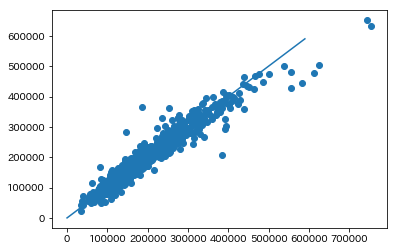

In [52]:
plt.scatter(trainY, train_pred)
x = np.arange(0, 600000, 10000)
y = x
plt.plot(x,y)

In [40]:
sample = pd.read_csv('sample_submission.csv')

In [46]:
sample['SalePrice'] = test_pred

In [42]:
sample.to_csv('submission1.csv', index=None)

In [ ]:
# 提出　RMSE=0.37682